In [1]:
#Importing relevant packages
import pandas as pd 
import numpy as np 
import pystan
import matplotlib.pyplot as plt

In [2]:
'''
Call Center Modeling 
'''

#Load the data locally
data = np.loadtxt('/Users/ash/Downloads/call-center.csv')

# Split the data into 24 separate series, one for each hour of the day
# Code from Scheffler's gist 
# (https://gist.github.com/cscheffler/6a03c9473297f21b78363ec7301d19d8#file-cs146-2-2-pre-class-work-ipynb)
current_time = 0
waiting_times_per_hour = [[] for _ in range(24)]  # Make 24 empty lists, one per hour
for t in data:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)
    
print('Number of datapoints:', len(waiting_times_per_hour[11]))
data = waiting_times_per_hour[11]

Number of datapoints: 892


In [3]:
#Stan model

model_cc = """

data {
//length is the size of the data, waitime is the individual wait time between calls
    int<lower=1> length; 
    real<lower=0> waitime[length];
//alpha and beta are the gamma prior parameters
    real<lower=0> alpha;
    real<lower=0> beta;
}

parameters {
//lamba is the exponetial likelihood parameter
    real<lower=0> lambda;                          
}

model {
    lambda ~ gamma(alpha, beta); 
    for(i in 1:length) {
        waitime[i] ~ exponential(lambda); 
    }
}

"""
stan_model_cc = pystan.StanModel(model_code=model_cc)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_134b0d50066e1a97cfd72f284bc79e99 NOW.


In [4]:
#Specifying call center data 
call_center_data = {
    'length': len(data),
    'waitime': data, 
    'alpha': 1, 
    'beta': 0.25
}

In [5]:
#Sampling using Stan and displaying the sampling results
stan_cc_results = stan_model_cc.sampling(data=call_center_data)
cc_results_lambda = stan_cc_results.extract()['lambda']
print(stan_cc_results)

Inference for Stan model: anon_model_134b0d50066e1a97cfd72f284bc79e99.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
lambda  14.84    0.01   0.51  13.85  14.49  14.85  15.18  15.81   1460    1.0
lp__   1516.4    0.02   0.73 1514.3 1516.2 1516.6 1516.8 1516.9   1707    1.0

Samples were drawn using NUTS at Wed Oct 17 12:12:02 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [6]:
#Computing the confidence interval for lambda
print('95% confidence interval for lambda is:', (np.percentile(cc_results_lambda, 2.5), 
                                                    np.percentile(cc_results_lambda,97.5)))

95% confidence interval for lambda is: (13.850487346728022, 15.803830966391658)


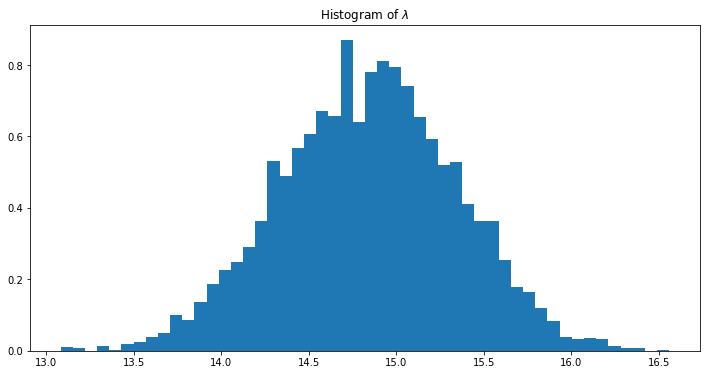

In [9]:
#Plotting the histogram for lambda
plt.figure(figsize=(12,6))
plt.hist(cc_results_lambda, density=True, bins=50)
plt.title('Histogram of $\lambda$')
plt.show()

In [10]:
'''
Normal Inverse Gamma Prior
'''

#Load the data
data_ = np.array([3.54551763569501, 4.23799861761927, 4.72138425951628, -0.692265320368236, 3.04473513808788, 3.10721270732507, 3.42982225852764, 3.12153903971176, 3.60532628639808, 2.46561737557325, 1.64059465916131, 2.4621623937158, 2.76744495617481, 2.11580054750407, 5.14077208608354, 4.90288499104252, 1.43357579078348, 4.78997817363558, 1.93633438207439, 2.43698838097178, 3.95389148701877, 2.4242295507716, 2.90256268679023, 2.90931728045901, 0.658072819386888, 3.05946763895983, 3.42615331539605, 2.68842833004417, 2.35850130765166, 2.20014998540933, 4.73846511350084, 4.19839721414451, 2.11805510171691, -0.572742936038015, 0.389413982010623, 3.87846130744249, 1.34057656890858, 0.7235748351719, 5.11042369840174, 4.00747556696571, 3.18080956726965, 3.24677964069676, 5.1154659863626, 1.80276616697155, 0.305877679021404, -0.449168307882718, 4.63705561194774, 1.37783714058301, 4.9608149859515, 6.7764195802069, 1.75515522922399, 7.04457337435215, 0.625185284955128, 2.25130734369064, 2.19770178119255, 2.16858257249432, 6.25367644481438, 0.116081323476489, 2.06315857864341, 1.82409781471718, 5.15226741230987, 2.03408231293173, -1.12450854337596, 5.03511270642234, 2.03841989653263, 5.80911741751597, 2.31718128783245, 4.97575010580997, 3.34262752222776, -0.786983904253601, 0.777362359850013, 0.975825009321195, 3.76354577515958, 7.27215002907876, 1.35404089480189, 3.76567940257157, 3.48573993343334, 1.85976988586156, 1.93567061960716, 5.31071812003942, 2.96832987672751, 3.32378908637275, 2.61631960054551, 5.80897964052825, 4.95215217171488, 1.32036772796131, 3.79932542233371, 3.08108492766309, 2.6734110081666, -0.14251851138521, 2.48744375588965, 3.98463042123415, 6.32781680028, 4.0029172024315, 4.23210369459457, 1.71412938967325, 5.16492114963802, 2.53409673107906, 4.77346963973334, 3.34088878725551, 4.77681472750664, 3.81135755590976, 1.14054269983137, 1.42057452397702, 0.132142311125433, 7.12577254064672, 4.85422012781764, 4.15745720676399, 4.48763147363348, 1.56060322283629, 2.64821761542887, 1.26655351354548, 4.48497722937931, 4.3286302403783, 4.26157679512625, 4.0597558651364, 5.14051109132496, 2.5660348362221, 1.10764013818617, 0.386889523012303, 3.54150473246237, 3.57480214382351, 1.95150869584847, 2.70688970563118, 2.47971849820016, 6.50838037000679, 4.01511556826974, 1.11562740835344, 5.02637639472439, 4.38184491686864, 5.60423144047386, 2.40067408379298, 5.7849941378344, 2.37225791084559, 6.86031465910273, 4.09214858239736, 6.85994063692621, 3.62202415158781, -1.11220646958158, 3.73920971696866, 3.24533871512216, 1.28724203643002, 0.291152541773164, 0.368630935755111, 6.71607270510525, 5.42278455200833, 5.35188416119281, 2.305874586163, -1.85878097203032, 2.69877382351447, 4.84121860550417, 4.40973060799391, 5.04399320650774, 2.68632252661298, 6.06531610659912, 3.11881325011993, 3.45532087005125, 3.08442259840346, 4.43564424136733, 2.84252623135804, 1.50536798885106, 1.48868622407603, 2.07322837615663, 2.5476910210998, 5.66941808257884, 2.16731067416426, 2.49843958833905, 3.94586413879977, 0.316433764679541, -0.608937441815983, 2.5943436558557, 1.05516869528337, 2.1447601332725, 6.65846634141906, 2.1771555267834, 5.23953812029442, 3.53629759842647, 6.03263538017003, 3.85739159396599, 5.95093453004638, 1.12856987160476, 3.5559912886093, 2.21974864244489, 3.38471394882135, -1.90805399279409, 3.5113699258973, 4.49319955412346, 5.10507952638867, 1.08277895384184, 4.58403638422759, 1.37304994426824, 4.17566975753523, 3.36454182510378, 0.177136582644021, 2.91337423388405, 3.22796455457526, 2.80124198378441, 1.95189718582788, 3.37659263896246, -1.6463045238231])
print(len(data_), "data")

200 data


In [11]:
#Stan model

model_nig = """

data {
//Data and its length
    int<lower=1> length; 
    real data_[length];
//alpha, beta, mu, nu of the NIG prior
    real<lower=0> alpha;
    real<lower=0> beta;
    real<lower=0> nu;
    real mu;
}

parameters {
//mean and var are the mean and variance of the normal likelihood (with unknown mean and variance)
    real mean_;
    real<lower=0> var_; 
}

model {
    var_ ~ inv_gamma(alpha, beta);
    mean_ ~ normal(mu, sqrt(var_/nu));
    for(i in 1:length) {
        data_[i] ~ normal(mean_, sqrt(var_)); 
    }
}

"""
stan_model_nig = pystan.StanModel(model_code=model_nig)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f3d02ba78fd42d0a638632520a6867e6 NOW.


In [12]:
#Specifying data for Stan
nig_data = {
    'length': len(data_),
    'data_': data_, 
    'alpha': 1.12, 
    'beta': 0.4,
    'nu':0.054,
    'mu':0
}

In [13]:
#Sampling using Stan and displaying the sampling results
stan_nig_results = stan_model_nig.sampling(data=nig_data)
nig_results_mean = stan_nig_results.extract()['mean_']
nig_results_var = stan_nig_results.extract()['var_']
print(stan_nig_results)

Inference for Stan model: anon_model_f3d02ba78fd42d0a638632520a6867e6.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mean_   3.07  2.3e-3   0.14    2.8   2.97   3.07   3.16   3.33   3614    1.0
var_    3.62  6.6e-3   0.36   2.98   3.37    3.6   3.85    4.4   3039    1.0
lp__  -233.2    0.02   1.04 -236.1 -233.6 -232.9 -232.5 -232.2   1737    1.0

Samples were drawn using NUTS at Wed Oct 17 13:39:51 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [14]:
#Computing the confidence interval for mean and variance
print('95% confidence interval for mean is:', (np.percentile(nig_results_mean, 2.5), 
                                                    np.percentile(nig_results_mean,97.5)))
print('95% confidence interval for variance is:', (np.percentile(nig_results_var, 2.5), 
                                                    np.percentile(nig_results_var,97.5)))

95% confidence interval for mean is: (2.798198119655621, 3.3294936656934633)
95% confidence interval for variance is: (2.97808915862992, 4.403567082267464)


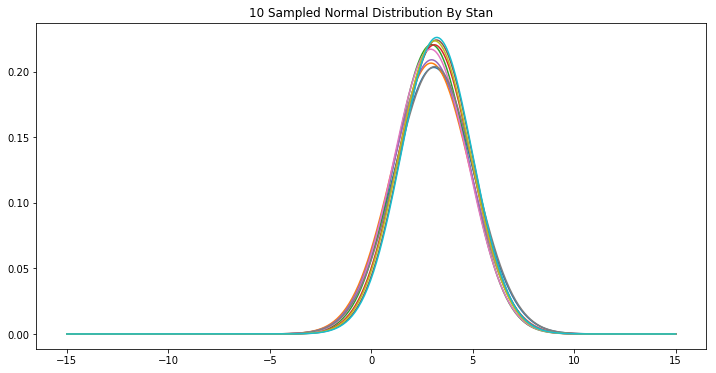

In [15]:
#Plotting 10 samples from Stan results
from scipy.stats import norm
x = np.linspace(-15,15,400)
choices = np.random.choice(4000,size=10,replace=False)
plt.figure(figsize=(12, 6))
for _ in choices:
    plt.plot(x, norm.pdf(x,loc=nig_results_mean[_],scale=np.sqrt(nig_results_var[_])))

plt.title('10 Sampled Normal Distribution By Stan')
plt.show()


In [4]:
'''
HRTEM
'''
#Loading data locally and changing to log-scale
hrtem = np.loadtxt('/Users/ash/Downloads/hrtem.csv')
print('%i data, min: %f, max: %f' % (len(hrtem), min(hrtem), max(hrtem)))
log_data = np.log(hrtem)

500 data, min: 1.051827, max: 28.942578


In [17]:
#Specifying data for Stan
hrtem_data = {
    'length': len(log_data),
    'data_': log_data, 
    'alpha': 2, 
    'beta': 5,
    'nu':0.1,
    'mu':2.3
}

In [18]:
#Sampling from Stan and printing out results
stan_hrtem_results = stan_model_nig.sampling(data=hrtem_data)
hrtem_results_mean = stan_hrtem_results.extract()['mean_']
hrtem_results_var = stan_hrtem_results.extract()['var_']
print(stan_hrtem_results)

Inference for Stan model: anon_model_f3d02ba78fd42d0a638632520a6867e6.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mean_   1.89  5.4e-4   0.03   1.83   1.87   1.89   1.91   1.95   3454    1.0
var_    0.49  6.3e-4   0.03   0.44   0.47   0.49   0.52   0.56   2581    1.0
lp__  -76.05    0.02   1.03 -78.84 -76.42 -75.73 -75.31 -75.04   1897    1.0

Samples were drawn using NUTS at Wed Oct 17 13:58:33 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [20]:
#Computing the confidence interval for mean and variance
print('95% confidence interval for mean is:', (np.percentile(hrtem_results_mean, 2.5), np.percentile(hrtem_results_mean,97.5)))
print('95% confidence interval for variance is:', (np.percentile(hrtem_results_var, 2.5),np.percentile(hrtem_results_var,97.5)))

95% confidence interval for mean is: (1.8305745551258448, 1.9526028346420938)
95% confidence interval for variance is: (0.4354322787100587, 0.5588026676368617)


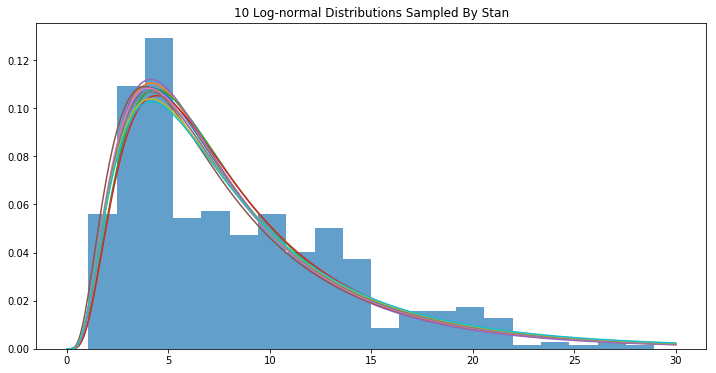

In [19]:
from scipy.stats import lognorm

choices = np.random.choice(4000,size=10,replace=False)
plt.figure(figsize=(12,6))
x = np.linspace(0, 30, 400)

for _ in choices:
    plt.plot(x, lognorm.pdf(x, np.sqrt(hrtem_results_var[_]),scale=np.exp(hrtem_results_mean[_])))
plt.hist(hrtem, bins=20, density=True, alpha=0.7)
plt.title('10 Log-normal Distributions Sampled By Stan')
plt.show()

In [41]:
'''
Mixture of Gaussians __1__
'''

model_mix = """

data {
//Data and its length
    int<lower=1> length; 
    real<lower=0> data_[length];   
}

parameters {
//mean and var are the mean and variance of the normal likelihood (with unknown mean and variance)
    simplex[2] p; 
    vector[2] mean_;
    vector<lower=0>[2] var_;
}

model {
    mean_ ~ normal(0,10);
    var_ ~ lognormal(0, 2); 
    for(i in 1:length) {
        real gau_1;
        real gau_2;
        gau_1 = normal_lpdf(data_[i] | mean_[1], var_[1]) + log(p[1]);
        gau_2 = normal_lpdf(data_[i] | mean_[2], var_[2]) + log(p[2]);
        target += log_sum_exp(gau_1, gau_2);
    }
}

"""
stan_model_mix = pystan.StanModel(model_code=model_mix)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9d65cfc3fae879b2537b695905afbe5a NOW.


In [46]:
mix_data = {
    'length': len(log_data),
    'data_': log_data
}
#Sampling from Stan and printing out results
mix_results = stan_model_mix.sampling(data=mix_data)
print(mix_results)

Inference for Stan model: anon_model_9d65cfc3fae879b2537b695905afbe5a.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
p[1]       0.42  2.1e-3   0.07   0.28   0.38   0.42   0.46   0.54   1001    1.0
p[2]       0.58  2.1e-3   0.07   0.46   0.54   0.58   0.62   0.72   1001    1.0
mean_[1]   2.52  1.7e-3   0.06    2.4   2.48   2.52   2.56   2.62   1121    1.0
mean_[2]   1.44  2.6e-3   0.08   1.29   1.38   1.43   1.49   1.62   1017    1.0
var_[1]    0.35  9.0e-4   0.03   0.29   0.32   0.34   0.37   0.42   1305    1.0
var_[2]     0.5  1.6e-3   0.05   0.41   0.46    0.5   0.53    0.6   1033    1.0
lp__     -506.5    0.05   1.73 -510.8 -507.4 -506.2 -505.3 -504.3   1376    1.0

Samples were drawn using NUTS at Thu Oct 18 15:01:21 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reductio

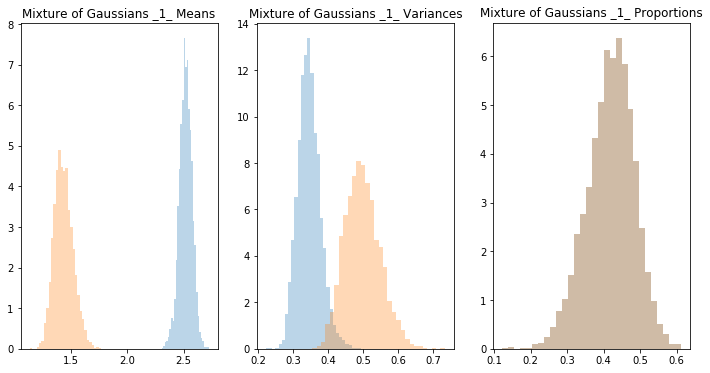

In [47]:
mixed1_mean1 =  mix_results.extract()['mean_'][:,0]
mixed1_mean2 =  mix_results.extract()['mean_'][:,1]
mixed1_var1 = mix_results.extract()['var_'][:,0]
mixed1_var2 = mix_results.extract()['var_'][:,1]
mixed1_p1 = mix_results.extract()['p'][:,0]
mixed1_p2 = mix_results.extract()['p'][:,1]

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.hist(mixed1_mean1, alpha=0.3, bins=30, density=True)
plt.hist(mixed1_mean2, alpha=0.3, bins=30, density=True)
plt.title('Mixture of Gaussians _1_ Means')
plt.subplot(1,3,2)
plt.hist(mixed1_var1, alpha=0.3, bins=30, density=True)
plt.hist(mixed1_var2, alpha=0.3, bins=30, density=True)
plt.title('Mixture of Gaussians _1_ Variances')
plt.subplot(1,3,3)
plt.hist(mixed1_p1, alpha=0.3, bins=30, density=True)
plt.hist(mixed1_p1, alpha=0.3, bins=30, density=True)
plt.title('Mixture of Gaussians _1_ Proportions')
plt.show()

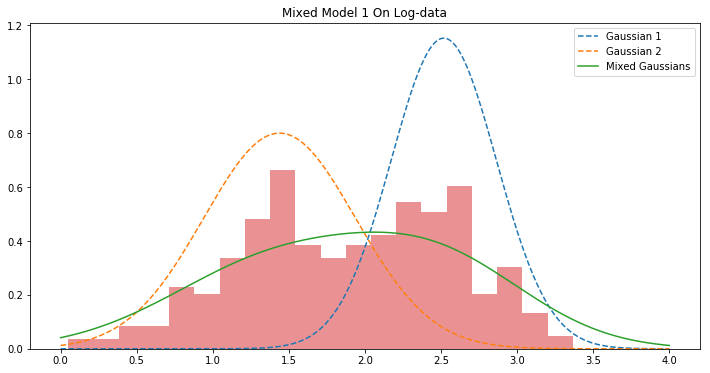

In [48]:
from scipy.stats import norm
plt.figure(figsize=(12,6))
x = np.linspace(0, 4, 400)

mixed_gaussians = np.mean(mixed1_p1)*norm.pdf(x, loc=np.mean(mixed1_mean1),scale=np.sqrt(np.mean(mixed1_var1))) + (1-np.mean(mixed1_p1))*norm.pdf(x, loc=np.mean(mixed1_mean2),scale=np.sqrt(np.mean(mixed1_var2)))
plt.plot(x, norm.pdf(x, loc=np.mean(mixed1_mean1),scale=np.mean(mixed1_var1)), linestyle='--', label='Gaussian 1')
plt.plot(x, norm.pdf(x, loc=np.mean(mixed1_mean2),scale=np.mean(mixed1_var2)), linestyle='--', label='Gaussian 2')
plt.plot(x,mixed_gaussians, label='Mixed Gaussians')
plt.hist(log_data, bins=20, density=True, alpha=0.5)
plt.title('Mixed Model 1 On Log-data')
plt.legend()
plt.show()

In [2]:
'''
Mixture of Gaussians __3__
'''

model_mix_3 = """

data {
//Data and its length
    int<lower=1> length; 
    real<lower=0> data_[length];
}

parameters {
//mean and var are the mean and variance of the normal likelihood (with unknown mean and variance)
    simplex[2] p; 
    vector[2] mean_;
    vector<lower=0>[2] var_;
}

model {
    var_ ~ inv_gamma(1, 1);
    mean_ ~ normal(0,10);
    for(i in 1:length) {
        real gau_1;
        real gau_2;
        gau_1 = normal_lpdf(data_[i] | mean_[1], sqrt(var_[1])) + log(p[1]);
        gau_2 = normal_lpdf(data_[i] | mean_[2], sqrt(var_[2])) + log(p[2]);
        target += log_sum_exp(gau_1, gau_2);
    }
}

"""
stan_model_mix_3 = pystan.StanModel(model_code=model_mix_3)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_080355cd049d7e529040e1ad4bd50372 NOW.


In [17]:
mix_data_3 = {
    'length': len(log_data),
    'data_': log_data
}
#Sampling from Stan and printing out results
mix_results_3 = stan_model_mix_3.sampling(data=mix_data_3)
print(mix_results_3)

Inference for Stan model: anon_model_080355cd049d7e529040e1ad4bd50372.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
p[1]       0.57  1.7e-3   0.06   0.45   0.52   0.57    0.6   0.69   1244    1.0
p[2]       0.43  1.7e-3   0.06   0.31    0.4   0.43   0.48   0.55   1244    1.0
mean_[1]   1.43  2.1e-3   0.08   1.28   1.37   1.42   1.47    1.6   1339    1.0
mean_[2]    2.5  1.4e-3   0.05   2.38   2.46    2.5   2.53    2.6   1436    1.0
var_[1]    0.25  1.2e-3   0.05   0.18   0.22   0.25   0.28   0.36   1499    1.0
var_[2]    0.14  5.9e-4   0.02    0.1   0.12   0.14   0.16    0.2   1720    1.0
lp__     -514.9    0.04   1.68 -519.1 -515.7 -514.5 -513.7 -512.7   1545    1.0

Samples were drawn using NUTS at Thu Oct 18 12:43:06 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reductio

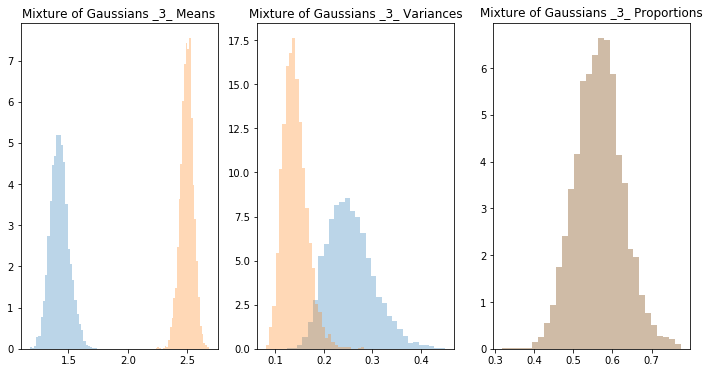

In [19]:
mixed1_mean1 =  mix_results_3.extract()['mean_'][:,0]
mixed1_mean2 =  mix_results_3.extract()['mean_'][:,1]
mixed1_var1 = mix_results_3.extract()['var_'][:,0]
mixed1_var2 = mix_results_3.extract()['var_'][:,1]
mixed1_p1 = mix_results_3.extract()['p'][:,0]
mixed1_p2 = mix_results_3.extract()['p'][:,1]

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.hist(mixed1_mean1, alpha=0.3, bins=30, density=True)
plt.hist(mixed1_mean2, alpha=0.3, bins=30, density=True)
plt.title('Mixture of Gaussians _3_ Means')
plt.subplot(1,3,2)
plt.hist(mixed1_var1, alpha=0.3, bins=30, density=True)
plt.hist(mixed1_var2, alpha=0.3, bins=30, density=True)
plt.title('Mixture of Gaussians _3_ Variances')
plt.subplot(1,3,3)
plt.hist(mixed1_p1, alpha=0.3, bins=30, density=True)
plt.hist(mixed1_p1, alpha=0.3, bins=30, density=True)
plt.title('Mixture of Gaussians _3_ Proportions')
plt.show()

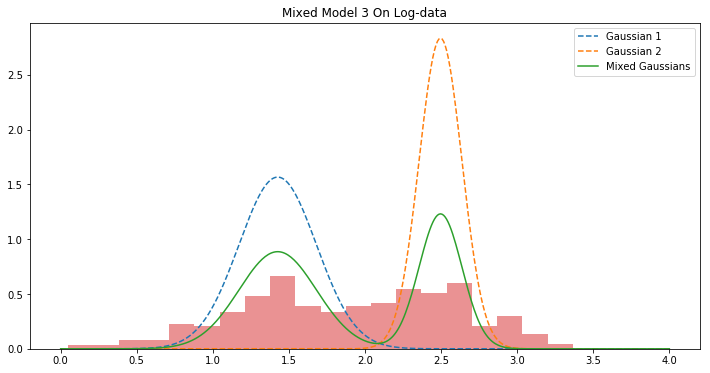

In [20]:
from scipy.stats import norm
plt.figure(figsize=(12,6))
x = np.linspace(0, 4, 400)

mixed_gaussians = np.mean(mixed1_p1)*norm.pdf(x, loc=np.mean(mixed1_mean1),scale=np.mean(mixed1_var1)) + (1-np.mean(mixed1_p1))*norm.pdf(x, loc=np.mean(mixed1_mean2),scale=np.mean(mixed1_var2))
plt.plot(x, norm.pdf(x, loc=np.mean(mixed1_mean1),scale=np.mean(mixed1_var1)), linestyle='--', label='Gaussian 1')
plt.plot(x, norm.pdf(x, loc=np.mean(mixed1_mean2),scale=np.mean(mixed1_var2)), linestyle='--', label='Gaussian 2')
plt.plot(x,mixed_gaussians, label='Mixed Gaussians')
plt.hist(log_data, bins=20, density=True, alpha=0.5)
plt.title('Mixed Model 3 On Log-data')
plt.legend()
plt.show()

In [21]:
'''
Mixture of Gaussians __2__
'''

model_mix_2 = """

data {
//Data and its length
    int<lower=1> length; 
    real<lower=0> data_[length];
    real<lower=0> alpha;
    real<lower=0> beta;
    real<lower=0> nu;
    real mu;
}

parameters {
//mean and var are the mean and variance of the normal likelihood (with unknown mean and variance)
    simplex[2] p; 
    vector[2] mean_;
    vector<lower=0>[2] var_;
}

model {
    var_ ~ inv_gamma(alpha, beta);
    mean_ ~ normal(mu, sqrt(var_/nu));
    for(i in 1:length) {
        real gau_1;
        real gau_2;
        gau_1 = normal_lpdf(data_[i] | mean_[1], sqrt(var_[1])) + log(p[1]);
        gau_2 = normal_lpdf(data_[i] | mean_[2], sqrt(var_[2])) + log(p[2]);
        target += log_sum_exp(gau_1, gau_2);
    }
}

"""
stan_model_mix_2 = pystan.StanModel(model_code=model_mix_2)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_cc255d0eaad30c6dc5ca0a069ab29537 NOW.


In [34]:
mix_data_2 = {
    'length': len(log_data),
    'data_': log_data,
    'alpha': 2, 
    'beta': 1,
    'nu':0.1,
    'mu':0
}
#Sampling from Stan and printing out results
mix_results_2 = stan_model_mix_2.sampling(data=mix_data_2)
print(mix_results_2)

Inference for Stan model: anon_model_cc255d0eaad30c6dc5ca0a069ab29537.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
p[1]       0.55  1.8e-3   0.06   0.43   0.51   0.54   0.58   0.68   1147    1.0
p[2]       0.45  1.8e-3   0.06   0.32   0.42   0.46   0.49   0.57   1147    1.0
mean_[1]    1.4  2.2e-3   0.08   1.27   1.35    1.4   1.45   1.57   1193    1.0
mean_[2]   2.48  1.6e-3   0.06   2.36   2.44   2.48   2.52   2.58   1253    1.0
var_[1]    0.24  1.2e-3   0.05   0.17   0.21   0.23   0.27   0.34   1374    1.0
var_[2]    0.15  6.5e-4   0.02   0.11   0.13   0.14   0.16    0.2   1476    1.0
lp__     -514.6    0.05   1.67 -518.6 -515.5 -514.3 -513.4 -512.4   1291    1.0

Samples were drawn using NUTS at Thu Oct 18 14:09:19 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reductio

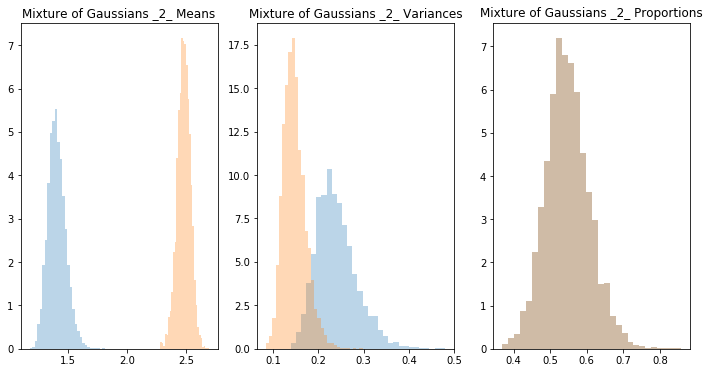

In [35]:
mixed1_mean1 =  mix_results_2.extract()['mean_'][:,0]
mixed1_mean2 =  mix_results_2.extract()['mean_'][:,1]
mixed1_var1 = mix_results_2.extract()['var_'][:,0]
mixed1_var2 = mix_results_2.extract()['var_'][:,1]
mixed1_p1 = mix_results_2.extract()['p'][:,0]
mixed1_p2 = mix_results_2.extract()['p'][:,1]

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.hist(mixed1_mean1, alpha=0.3, bins=30, density=True)
plt.hist(mixed1_mean2, alpha=0.3, bins=30, density=True)
plt.title('Mixture of Gaussians _2_ Means')
plt.subplot(1,3,2)
plt.hist(mixed1_var1, alpha=0.3, bins=30, density=True)
plt.hist(mixed1_var2, alpha=0.3, bins=30, density=True)
plt.title('Mixture of Gaussians _2_ Variances')
plt.subplot(1,3,3)
plt.hist(mixed1_p1, alpha=0.3, bins=30, density=True)
plt.hist(mixed1_p1, alpha=0.3, bins=30, density=True)
plt.title('Mixture of Gaussians _2_ Proportions')
plt.show()

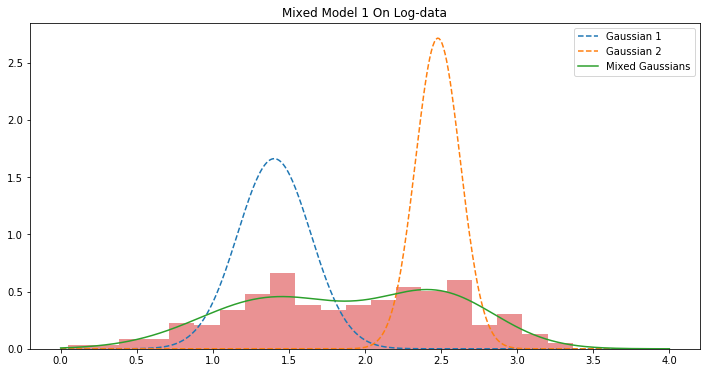

In [40]:
from scipy.stats import norm
plt.figure(figsize=(12,6))
x = np.linspace(0, 4, 400)

mixed_gaussians = np.mean(mixed1_p1)*norm.pdf(x, loc=np.mean(mixed1_mean1),scale=np.sqrt(np.mean(mixed1_var1))) + (1-np.mean(mixed1_p1))*norm.pdf(x, loc=np.mean(mixed1_mean2),scale=np.sqrt(np.mean(mixed1_var2)))
plt.plot(x, norm.pdf(x, loc=np.mean(mixed1_mean1),scale=np.mean(mixed1_var1)), linestyle='--', label='Gaussian 1')
plt.plot(x, norm.pdf(x, loc=np.mean(mixed1_mean2),scale=np.mean(mixed1_var2)), linestyle='--', label='Gaussian 2')
plt.plot(x,mixed_gaussians, label='Mixed Gaussians')
plt.hist(log_data, bins=20, density=True, alpha=0.5)
plt.title('Mixed Model 1 On Log-data')
plt.legend()
plt.show()